In [1]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import warnings
from brancharchitect.io import read_newick
from brancharchitect.distances.distances import relative_robinson_foulds_distance
from brancharchitect.distances.plotting.matrix_plots import plot_distance_matrix
from brancharchitect.distances.plotting.scatter_plots import plot_component_umap_3d
from brancharchitect.distances.analysis.dimensionality import perform_umap
import glob
from typing import List
from brancharchitect.tree import Node

import numpy as np
warnings.filterwarnings("ignore", category=UserWarning)


In [4]:
trees: Node | List[Node] = read_newick(
    "/Users/berksakalli/Projects/BranchArchitect/notebooks/data/alltrees_treees_cutted/alltrees.trees_cutted.newick"
)

weighted = True  # Set to True if you want to use weighted distances
max_trees: int = len(trees)  # Use all trees
print(f"Profiling {max_trees} trees ({max_trees * (max_trees - 1) // 2} pairs)")
trees = trees[:max_trees] if isinstance(trees, list) else [trees]

Profiling 235 trees (27495 pairs)


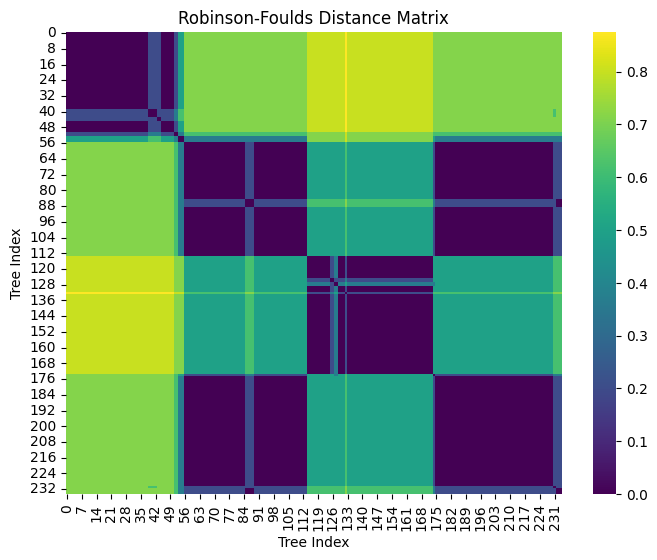

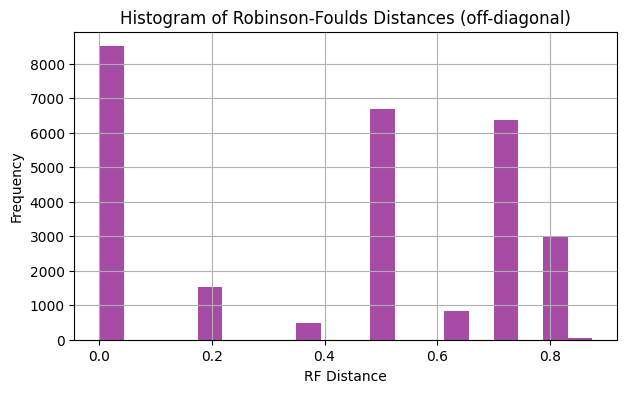

In [6]:
rf_matrix = np.zeros((max_trees, max_trees), dtype=float)

for i in range(max_trees):
    for j in range(i):
        rf: float = relative_robinson_foulds_distance(trees[i], trees[j])
        rf_matrix[i, j] = rf
        rf_matrix[j, i] = rf

fig, ax = plt.subplots(figsize=(8, 6))
plot_distance_matrix(rf_matrix, ax=ax, title="Robinson-Foulds Distance Matrix")
plt.show()
plt.figure(figsize=(7,4))
plt.hist(rf_matrix[np.triu_indices(max_trees, 1)], bins=20, color='purple', alpha=0.7)
plt.title('Histogram of Robinson-Foulds Distances (off-diagonal)')
plt.xlabel('RF Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
rf_embedding = perform_umap(rf_matrix)
plot_component_umap_3d(rf_embedding, cluster_labels= None, title="UMAP of RF Distances")